# Multiple Linear Regression Modeling On Data From Bike-Sharing Company BoomBikes

#### 

**Business Problem**:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

BoomBikes aspires to understand the demand for shared bikes among people. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
   - Which variables are significant in predicting the demand for shared bikes.
   - How well those variables describe the bike demands

#### 
**Data Description:** 

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. The data contains information on past bike bookings and various potential drivers like season, day of week, month, weather conditions, etc. 

#### 
**Structure of the Analysis**:

The analysis will follow the below outlined rough structure. Not all steps may be in order since EDA is an iterative process. However, below is what we have covered in this exercise. 

**1. Reading & Understanding The Data (EDA)**
  

**2. Data Preparation For Model Building**
   

**3. Model Development**
  
**4. Model Evaluation**

## Step 1: Reading and Understanding the Data

Let us first import the required packages, read the data, and get some high-level understanding of it.

In [277]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [278]:
# Load the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [279]:
bike = pd.read_csv("day.csv")
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [260]:
# Size of the dataset
bike.shape

(730, 16)

In [280]:
# Contents of the data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


The data has 730 records and 16 features.
All of the fields seem to have the right formats as seen above (when compared against their values and the data dictionary).

Let's check the overall level of the data - based on the column values, only the below mentioned columns have completely unique information.

In [282]:
# Checking the level (primary keys) of the data.
print(bike['instant'].nunique())
print(bike['dteday'].nunique())

730
730


The column 'instant' is just a record-id and 'dteday' is the date of that recorded observation.

### Categorical and numerical columns
Looking at the values of the columns, other than above mentioned two columns, it seems that -
- columns from 'season' to 'weathersit' are categorical
- columns from 'temp' onwards are numerical

In [283]:
# Identify numerical and categorical columns
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Dropping useless data

In [284]:
# Drop duplicates
print(bike.shape)
bike2 = bike.drop_duplicates()
print(bike2.shape)

(730, 16)
(730, 16)


There were no duplicate records so nothing was dropped.

Now, we will drop incorrect or irrelevant columns.

In [285]:
# Dropping the first two columns as they are not useful to the modeling process
bike2 = bike2.drop(['instant','dteday'],axis=1)
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [286]:
# Dropping casual & registered columns as they are neither predictors nor target variables. 
# They add up to form the target variable which is already in a separate column.
bike2 = bike2.drop(['casual','registered'],axis=1)
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Updated list of columns -

In [287]:
bike2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Missing value treatment

In [288]:
bike2.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

No missing values were found in any column. So, we are good to proceed with next steps.

### Let's look at the columns one by one now. We want to fully understand the values of each column as well as perform -
- Incorrect Data Or Format Check
- Sanity Checks
- Outlier Detection

#### Numerical variables first -

In [291]:
bike2[['temp','atemp','hum','windspeed','cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


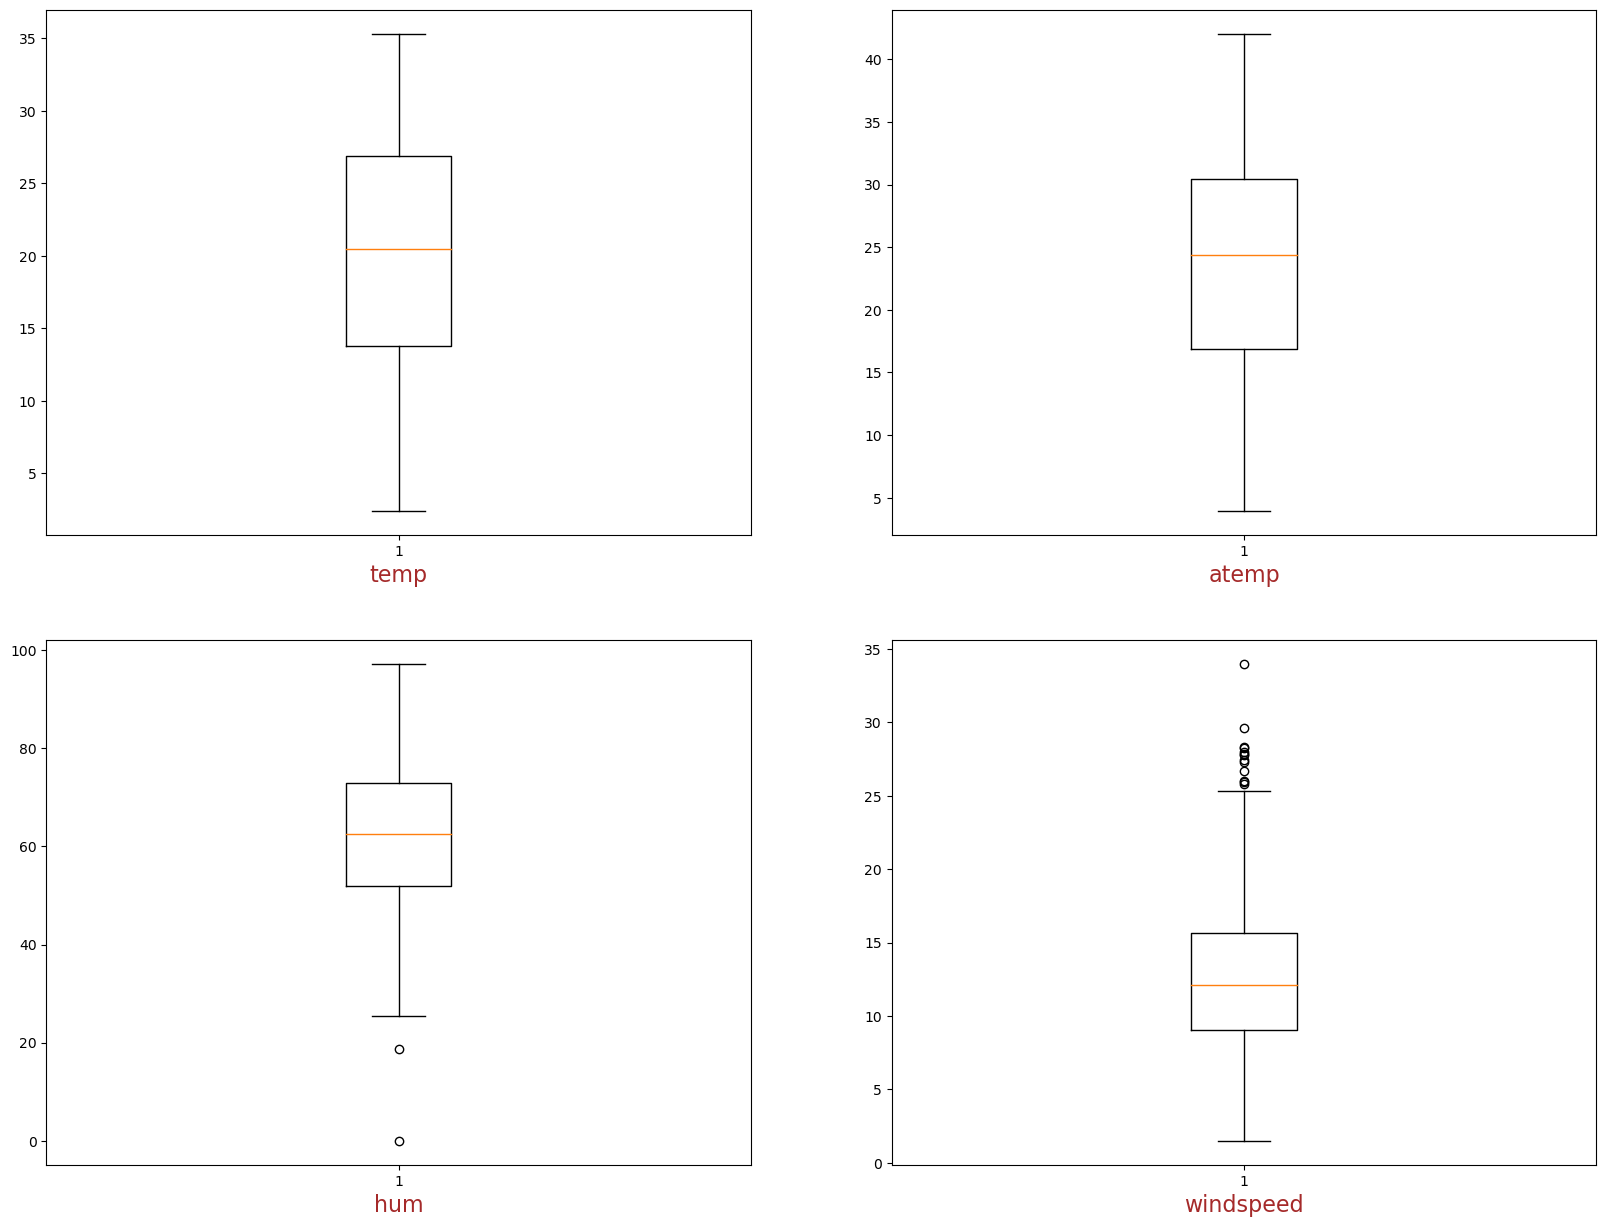

In [306]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.xlabel("temp", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.boxplot(bike2['temp'])
plt.subplot(2,2,2)
plt.xlabel("atemp", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.boxplot(bike2['atemp'])
plt.subplot(2,2,3)
plt.xlabel("hum", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.boxplot(bike2['hum'])
plt.subplot(2,2,4)
plt.xlabel("windspeed", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.boxplot(bike2['windspeed'])
plt.show()


Let's check the spread and distribution fo the target variable separately

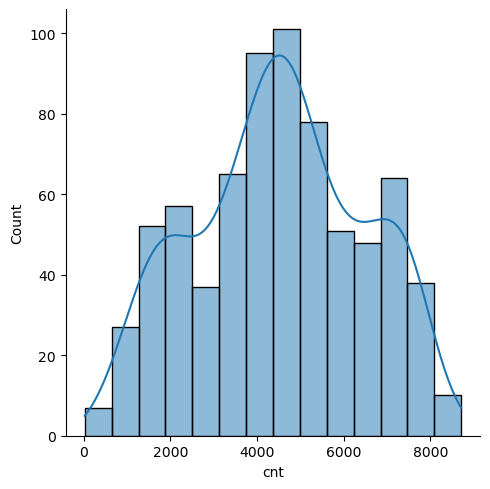

In [310]:
sns.displot(bike2['cnt'],kde=True)
plt.show()

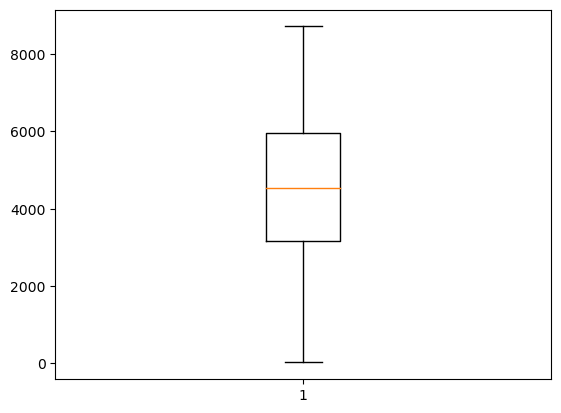

In [311]:
plt.boxplot(bike2['cnt'])
plt.show()

Looking at the above percentile distributions and charts, we do not see any data issues, sanity problems, incorrect data, or outliers in the numeric variables.

#### Now, categorical variables -

In [319]:
print("Distribution for season -")
print(bike2['season'].value_counts())
print("\n")
print("Distribution for year -")
print(bike2['yr'].value_counts())
print("\n")
print("Distribution for months -")
print(bike2['mnth'].value_counts())
print("\n")
print("Distribution for holiday -")
print(bike2['holiday'].value_counts())
print("\n")
print("Distribution for weekday -")
print(bike2['weekday'].value_counts())
print("\n")
print("Distribution for working day -")
print(bike2['workingday'].value_counts())
print("\n")
print("Distribution for weather situation -")
print(bike2['weathersit'].value_counts())

Distribution for season -
3    188
2    184
1    180
4    178
Name: season, dtype: int64


Distribution for year -
0    365
1    365
Name: yr, dtype: int64


Distribution for months -
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


Distribution for holiday -
0    709
1     21
Name: holiday, dtype: int64


Distribution for weekday -
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


Distribution for working day -
1    499
0    231
Name: workingday, dtype: int64


Distribution for weather situation -
1    463
2    246
3     21
Name: weathersit, dtype: int64


Looking at the above distributions, we do not see any data issues, sanity problems, incorrect data, or outliers in the categorical variables.

### Data Visualization, Univariate Analysis, Bivariate Analysis

#### Numerical variables

Let's do a pairplot and study the distributions of numeric variables and their correlations with each other and with the target variable.

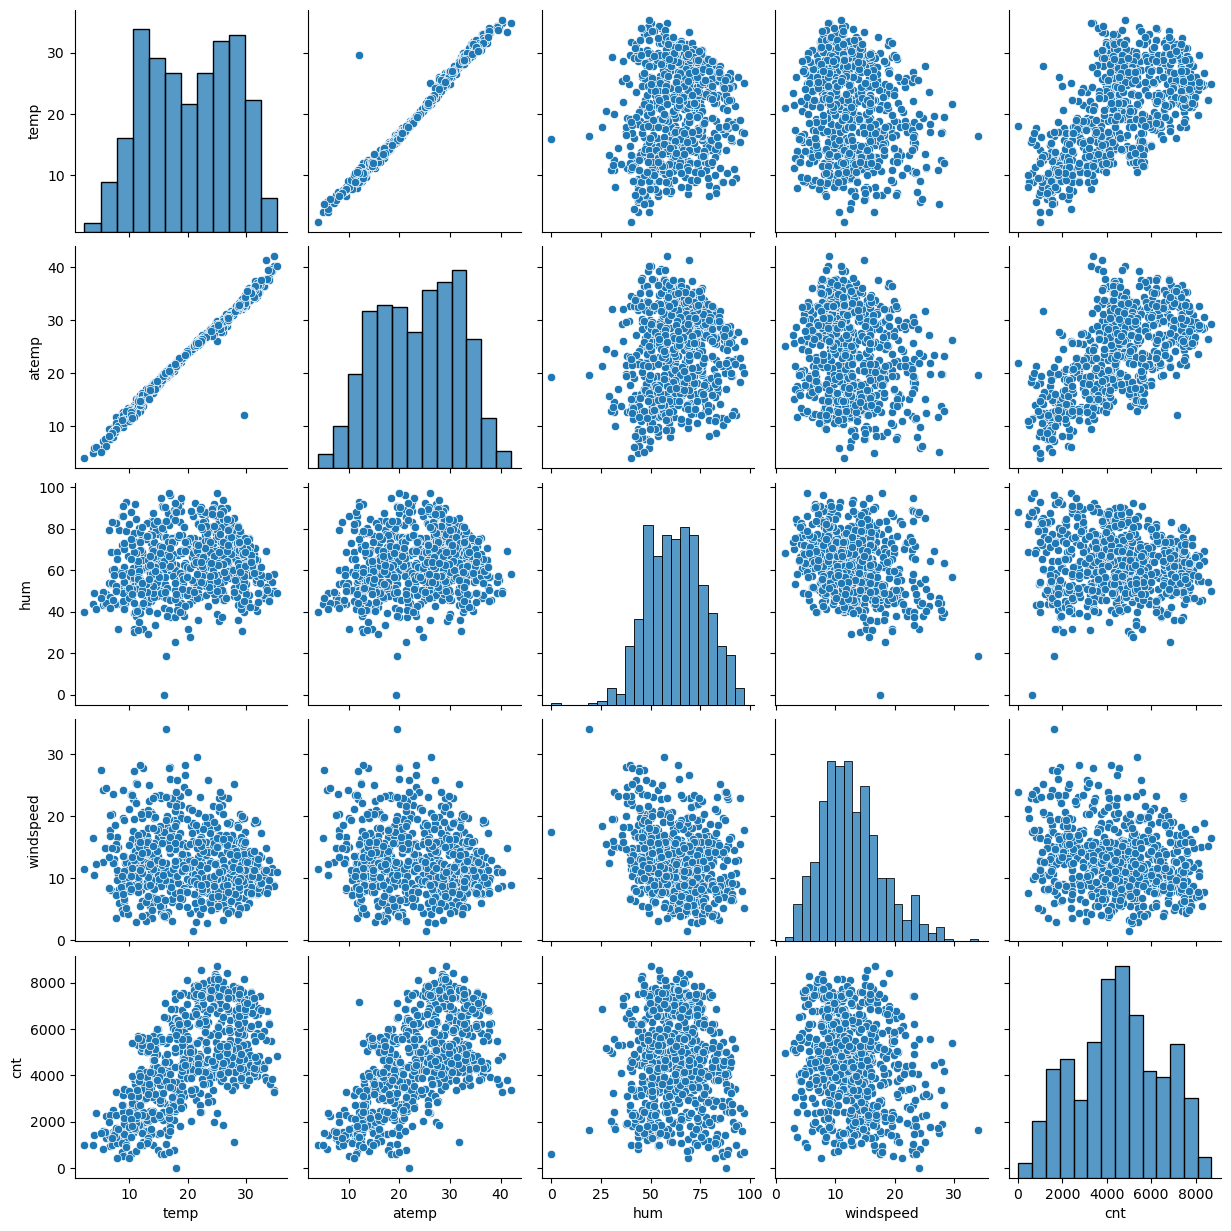

In [320]:
sns.pairplot(bike2[['temp','atemp','hum','windspeed','cnt']])
plt.show()

#### Key learnings -
- As expected, temp and atemp are highly correlated and one of them will need to be removed.
- All variables seem to normally or approximately normally distributed.
- temp and atemp show a linear relationship with the target variable cnt. 
- Other variables have weak but some linear relation with the target variable.
- Hence, all things considered, it makes sense to develop a linear model with this data.

#### Categorical Variables

We will use boxplots to study the relationship of categorical variables with the target variable.

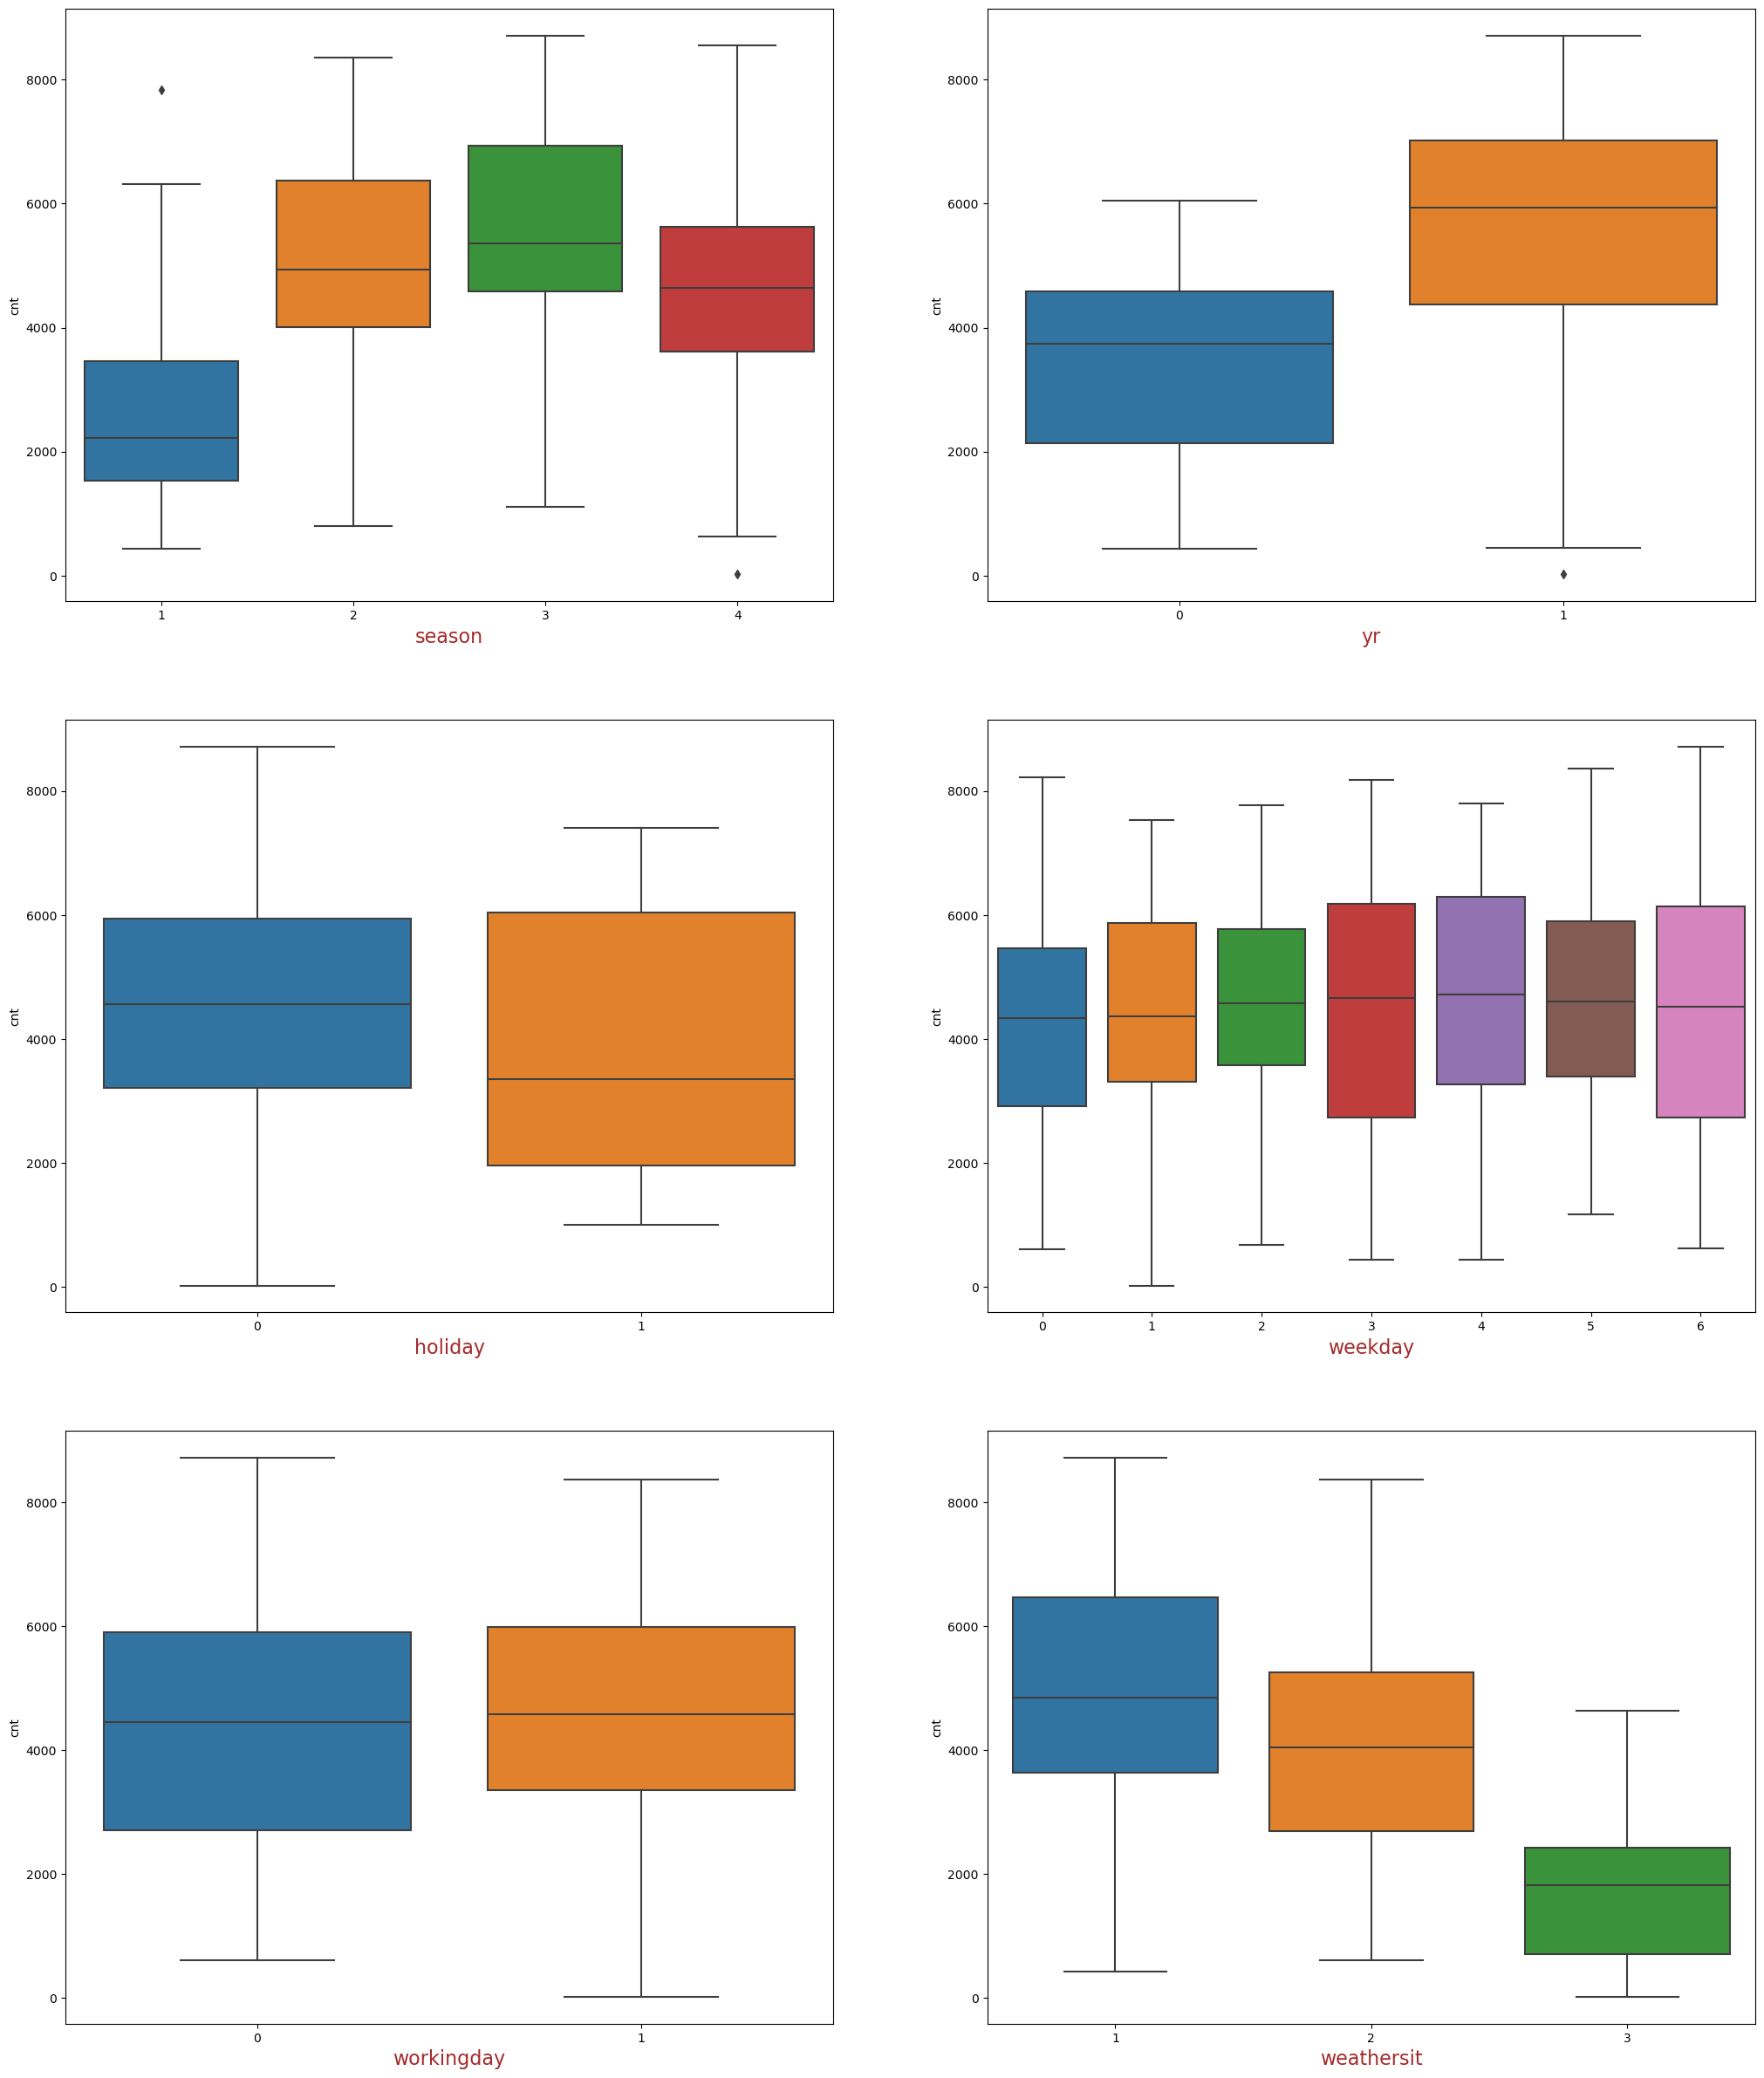

In [325]:
plt.figure(figsize=(25,30))
plt.subplot(3,2,1)
plt.xlabel("season", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
sns.boxplot(data=bike2,x='season',y='cnt')
plt.subplot(3,2,2)
plt.xlabel("yr", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
sns.boxplot(data=bike2,x='yr',y='cnt')
plt.subplot(3,2,3)
plt.xlabel("holiday", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
sns.boxplot(data=bike2,x='holiday',y='cnt')
plt.subplot(3,2,4)
plt.xlabel("weekday", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
sns.boxplot(data=bike2,x='weekday',y='cnt')
plt.subplot(3,2,5)
plt.xlabel("workingday", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
sns.boxplot(data=bike2,x='workingday',y='cnt')
plt.subplot(3,2,6)
plt.xlabel("weathersit", fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
sns.boxplot(data=bike2,x='weathersit',y='cnt')
plt.show()

<Axes: xlabel='mnth', ylabel='cnt'>

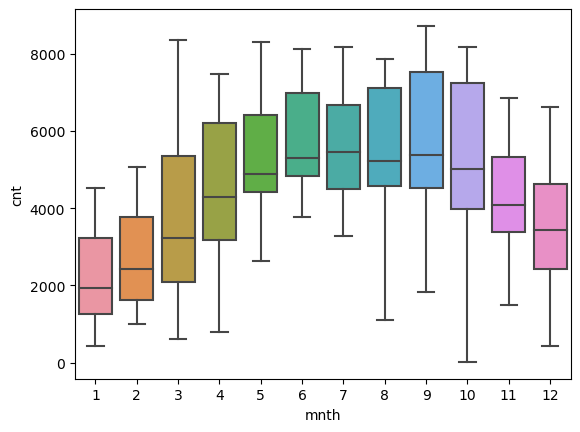

In [326]:
sns.boxplot(data=bike2,x='mnth',y='cnt')

#### Key learnings -
- Some of the categorical variables do seem to have an impact on the target variable.
- We have the highest bike-bookings in season 3 followed by seasons 2 & 4.
- Year has more bookings in year 1.
- Holiday, working day, and weekday have weak to no relationship with target variable.
- Weather situation has a significant impact on target variable.
- Months also have a significant impact.

#### We noticed various relationships between the predictor variables and the target. We will use this information to guide us but not to pick and drop variables at this stage. We will let the modeling process take care of that.

#### Let's get a quantified correlation matrix and assess potential multicollinearity.

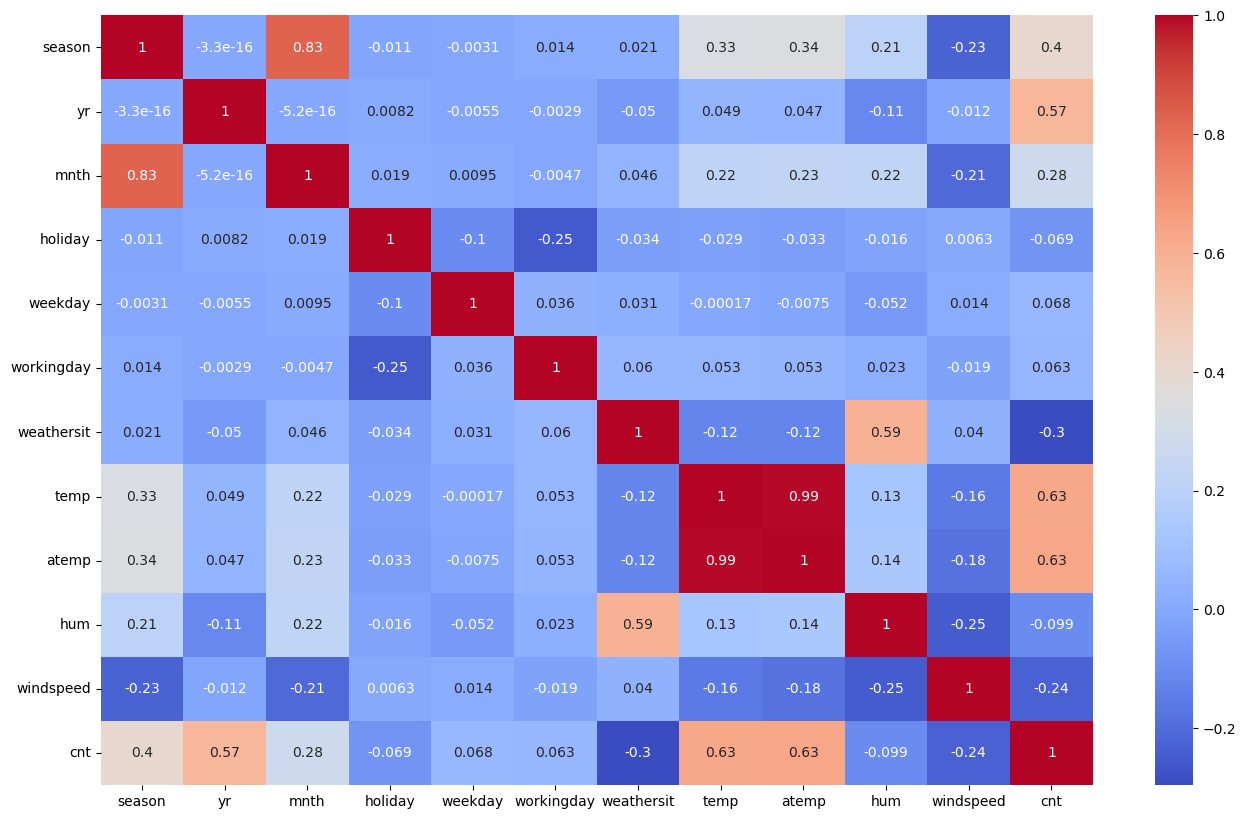

In [327]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike2.corr(),cmap="coolwarm",annot = True)
plt.show()

#### Key learnings -
- temp and atemp are extremely correlated with 0.99 correlation coefficient
- Target variable is highly to moderately correlated with temp, atemp, yr, and season.
- Categorical variables like holiday, weekday, and workingday could have combined multicollinearity due to the way they are defined.
- Also, weather situation could have multicollinearity with season and humidity combined.

#### We are not dropping any variables due to multicollinearity at this point. We will use VIF & p-value criteria to drop variables later after fine performing corase tuning using RFE.

## Step 2: Data Preparation

#### Map some categorical values to numeric values

In [328]:
# Starting with 'season'
print(bike2['season'].value_counts())
print("\n")
bike2[['season']] = bike2[['season']].apply(lambda x : x.map({1:'spring',2:'summer',3:'fall',4:'winter'}))
print(bike2['season'].value_counts())

3    188
2    184
1    180
4    178
Name: season, dtype: int64


fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


In [329]:
# Now 'weathersit'
print(bike2['weathersit'].value_counts())
print("\n")
bike2[['weathersit']] = bike2[['weathersit']].apply(lambda x : x.map({1:'clear',2:'misty',3:'light_rain'}))
print(bike2['weathersit'].value_counts())

1    463
2    246
3     21
Name: weathersit, dtype: int64


clear         463
misty         246
light_rain     21
Name: weathersit, dtype: int64


In [330]:
# Now month of year
print(bike2['mnth'].value_counts())
print("\n")
bike2[['mnth']] = bike2[['mnth']].apply(lambda x : x.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',
                                                    7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}))
print(bike2['mnth'].value_counts())

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64


jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64


In [331]:
# Now day of week
print(bike2['weekday'].value_counts())
print("\n")
bike2[['weekday']] = bike2[['weekday']].apply(lambda x : x.map({0:'mon',1:'tue',2:'wed',
                                                                3:'thu',4:'fri',5:'sat',6:'sun'}))
print(bike2['weekday'].value_counts())

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


sun    105
mon    105
tue    105
wed    104
fri    104
sat    104
thu    103
Name: weekday, dtype: int64


Other categorical variables already have numeric values so we don't need to map them.

#### Convert categorical variables to dummy variables

In [332]:
bike2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sun,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,mon,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,tue,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,wed,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,thu,1,clear,9.305237,11.46350,43.6957,12.522300,1600


Creating dummy variables for season, mnth, & weekday and dropping the first columns in each to avoid multicollinearity. Since these variables are all equally distributed, we are not concerned with which column we are dropping.

In [333]:
tmp_sn = pd.get_dummies(bike2['season'],drop_first=True)
bike3 = pd.concat([bike2,tmp_sn],axis=1)

tmp_mn = pd.get_dummies(bike2['mnth'],drop_first=True)
bike3 = pd.concat([bike3,tmp_mn],axis=1)

tmp_wd = pd.get_dummies(bike2['weekday'],drop_first=True)
bike3 = pd.concat([bike3,tmp_wd],axis=1)

In [334]:
bike3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sun,0,misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,0,0,0
1,spring,0,jan,0,mon,0,misty,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,jan,0,tue,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,1,0
3,spring,0,jan,0,wed,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,0,1
4,spring,0,jan,0,thu,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


Creating dummy variables for weathersit and dropping the light_rain column as it seems least important.

In [335]:
print(bike2['weathersit'].value_counts())
tmp_ws = pd.get_dummies(bike2['weathersit'])
bike3 = pd.concat([bike3,tmp_ws],axis=1)

clear         463
misty         246
light_rain     21
Name: weathersit, dtype: int64


In [336]:
bike3.drop(['light_rain'],axis=1,inplace=True)

In [337]:
bike3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,misty
0,spring,0,jan,0,sun,0,misty,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,jan,0,mon,0,misty,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,jan,0,tue,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,1,0
3,spring,0,jan,0,wed,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,1,0
4,spring,0,jan,0,thu,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,1,0


The other columns are already in a binary 0-1 format so don't need to be converted to dummies.
Now dropping the original columns for which we have got the dummy variables.

In [338]:
bike3.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
bike3.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,1,0


In [339]:
bike3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'clear', 'misty'],
      dtype='object')

#### Train-test split, scaling, and separating X & y variables

In [340]:
# Train-test split
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike3,train_size=0.7,test_size=0.3,random_state=100)

In [341]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [342]:
# Scaling - using min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [343]:
# Apply scaler() to all the numerical columns i.e. skipping the binary columns and dummy variables
varlist = ['temp','atemp','hum','windspeed','cnt']
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [344]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [346]:
# Double checking
df_train[varlist].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


Since this was the training set, we used fit_transform. On the test set, we will only use transform.

In [347]:
# Dividing into X and y sets for model building
y_train = df_train.pop('cnt')
X_train = df_train

In [348]:
# Double checking
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   spring      510 non-null    uint8  
 8   summer      510 non-null    uint8  
 9   winter      510 non-null    uint8  
 10  aug         510 non-null    uint8  
 11  dec         510 non-null    uint8  
 12  feb         510 non-null    uint8  
 13  jan         510 non-null    uint8  
 14  jul         510 non-null    uint8  
 15  jun         510 non-null    uint8  
 16  mar         510 non-null    uint8  
 17  may         510 non-null    uint8  
 18  nov         510 non-null    uint8  
 19  oct         510 non-null    

## Step 3: Model Development

We will be using the backward selection method here i.e., we will start with all the features and then drop features as required till we reach a reasonable number of features.

In [349]:
# Fit a model using all variables 
import statsmodels.api as sm

# Add a constant
X_train_sm = sm.add_constant(X_train)

# Create the first fitted model
lr_1 = sm.OLS(y_train,X_train_sm).fit()

In [350]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          8.42e-181
Time:                        22:04:36   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0360      0.043      0.835      0.4

The model has high R-square and low Prob(F-statistic) but is sufferring from obvious multicollinearity. Looking at the p-values, more than half of the model coefficients seem insignificant. We are using a 5% threshold for p-value here.

In [351]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [355]:
# Since we will need to do this repeatedly so let's create a function.
def vif_calc(df):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [356]:
vif_calc(X_train)

,Features,VIF
2,workingday,126.78
3,temp,67.12
4,atemp,56.09
23,sun,29.06
21,mon,27.51
7,spring,10.80
27,clear,10.64
9,winter,9.52
28,misty,9.22
8,summer,8.31


#### More than half of the features have VIF > 5 and many have a VIF > 10 as well. Also, as seen above, more than half of the coefficients were insignificant. Hence, we need to drop bad features. We will start with RFE for some coarse tuning and then do manual fine tuning.

Recursive Feature Elimination -
After a few trials using various values of n_features_to_select to build the models, it was found that 12 seemed to be the most optimal. It had a very good accuracy, dropped the right features eventually, and left us with a small number of features.

In [357]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [358]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [359]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', False, 6),
 ('feb', False, 7),
 ('jan', False, 4),
 ('jul', True, 1),
 ('jun', False, 17),
 ('mar', False, 18),
 ('may', False, 9),
 ('nov', False, 5),
 ('oct', False, 15),
 ('sep', True, 1),
 ('mon', False, 11),
 ('sat', False, 14),
 ('sun', False, 2),
 ('thu', False, 16),
 ('tue', False, 12),
 ('wed', False, 13),
 ('clear', True, 1),
 ('misty', True, 1)]

In [360]:
# Columns to keep as per RFE process
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'jul', 'sep', 'clear', 'misty'],
      dtype='object')

In [361]:
# Columns to drop as per RFE process
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'dec', 'feb', 'jan', 'jun', 'mar', 'may',
       'nov', 'oct', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [362]:
# Creating updated X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_sm = sm.add_constant(X_train_rfe)

# Create the updated model
lr_2 = sm.OLS(y_train,X_train_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          1.69e-190
Time:                        22:15:08   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0459      0.047      0.974      0.3

All coefficients except the constant are significant so nothing to drop by using just p-value. Let's look at the VIFs.

In [363]:
# Recalculating VIF for all remaining variables
vif_calc(X_train_rfe)

,Features,VIF
3,hum,24.62
2,temp,21.12
10,clear,14.13
11,misty,8.68
5,spring,5.46
4,windspeed,4.61
7,winter,4.02
6,summer,3.16
0,yr,2.09
8,jul,1.59


Humidity has the highest VIF so let's drop that first.

In [365]:
# Manual feature elimination
X_train_new = X_train_rfe.drop(['hum'],axis=1)

In [366]:
# Create the updated model
X_train_sm = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_sm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          2.40e-187
Time:                        22:17:58   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0855      0.038     -2.261      0.0

So far, no drop in model performance. Let's drop more variables using VIFs.

In [367]:
# Recalculating VIF for all remaining variables
vif_calc(X_train_new)

,Features,VIF
9,clear,14.07
2,temp,12.55
10,misty,7.86
3,windspeed,4.59
4,spring,3.98
5,summer,2.72
6,winter,2.65
0,yr,2.07
7,jul,1.59
8,sep,1.34


In [368]:
# Drop 'clear'
X_train_new = X_train_new.drop(['clear'],axis=1)

In [369]:
# Create the updated model
X_train_sm = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_sm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 21 Jun 2023   Prob (F-statistic):          5.44e-163
Time:                        22:21:00   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1872      0.033      5.638      0.0

In [370]:
# Recalculating VIF for all remaining variables
vif_calc(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,summer,2.21
4,spring,2.08
0,yr,2.06
6,winter,1.76
7,jul,1.58
9,misty,1.52
8,sep,1.33
1,holiday,1.04


Now, all features have low VIF. Temperature still has VIF just above 5 but since it is one of the important variables, we will ignore the borderline VIF. 

#### We have got a pretty godd model with almost 80% R-square, low Prob (F-statistic), all significant coefficients, and eliminated multicollinearity. We will use this as our final model and perform the next steps. 

#### Residual Analysis of the train data

In [372]:
# Residual analysis
y_train_pred = lr_4.predict(X_train_sm)

Text(0.5, 0, 'Errors')

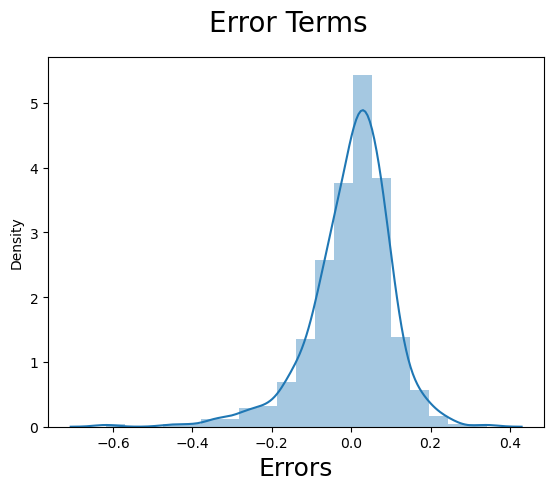

In [373]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred),bins=20)
fig.suptitle('Error Terms',fontsize=20)                  # Plot heading 
plt.xlabel('Errors',fontsize=18)                         # X-label

The error terms are approximately normally distributed with mean close to zero.

## Step 4: Model Evaluation

First, let's run the model on the test data and plot the actual vs predicted graph.

In [374]:
# Scaling the numerical variables in the test dataset
varlist = ['temp','atemp','hum','windspeed','cnt']
df_test[varlist] = scaler.transform(df_test[varlist])

In [375]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,clear,misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,1,0,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,0,1,0


In [376]:
y_test = df_test.pop('cnt')
X_test = df_test

In [377]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_sm = sm.add_constant(X_test_new)

In [378]:
# Making predictions
y_test_pred = lr_4.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

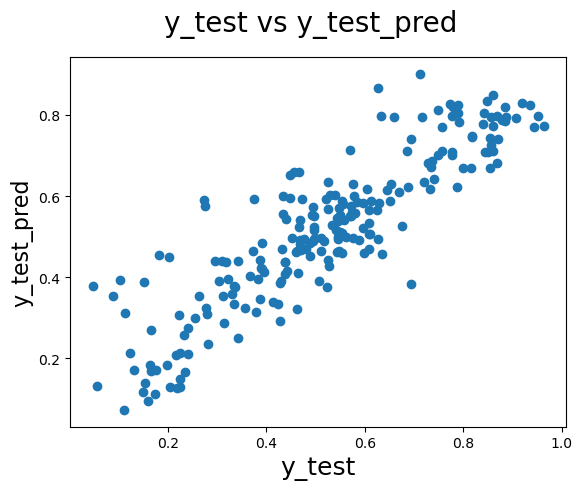

In [379]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

The actual vs predicted values on the test set are close, hence, our model is doing a good job. Let's confirm with R-square.

#### R-square score on the test set.

In [380]:
from sklearn import metrics

In [381]:
metrics.r2_score(y_test,y_test_pred)

0.7778798147259003

The R-square on the test set is ~78% which is very close to what we obtained on the train set (~79%) indicating that our model is stable.